# ORCA Data Mining Example
This Jupyter Notebook provides examples on how to use shared ORCA resources and functions to perform data mining tasks

In [1]:
import os
import numpy as np
import pandas as pd
import sys
import logging
logging.basicConfig(level=logging.WARN, format='%(asctime)s [%(levelname)s]: %(message)s')

from features import get_all_features
import matplotlib.pyplot as plt
import seaborn as sns 

# load dataset from stored pickle file or orca
if os.path.exists('features.pkl'):
    df = pd.read_pickle('features.pkl')
else:
    # get all fully processed artifacts for dataset
    features = get_all_features(fully_processed=True, verbose=True)
    df = pd.DataFrame(features)
    df.to_pickle('features.pkl')


In [2]:
# replace missing family and disposition fields
df['family'].fillna('none', inplace=True)
df['disposition'].fillna('suspect', inplace=True)

In [3]:
# Examine missing values
missing_totals  = df.isna().sum()
missing_percent = missing_totals / len(df) * 100
missing  = pd.concat([missing_totals, missing_percent], axis=1)
missing.columns = ['Total Missing', 'Percent Missing']
missing.sort_values(by='Total Missing', ascending=False)


,Total Missing,Percent Missing
038,10357,99.223989
037,10357,99.223989
026,10292,98.601265
027,10292,98.601265
025,10292,98.601265
039,10283,98.515041
031,9586,91.837517
032,9586,91.837517
033,9586,91.837517
014,9325,89.337038


In [4]:
# Explore data by type
for dtype in set(df.dtypes.to_list()):
    print(f'Summary of data type {dtype}')
    print(df.select_dtypes(dtype).apply(pd.Series.nunique, axis = 0),"\n")

Summary of data type object
family         77
disposition     2
dtype: int64 

Summary of data type float64
000    2735
001       8
002    4056
003    5571
004     386
005     157
006    2401
007     236
008     134
009    1861
010     115
011     128
012     657
016     890
017     146
018    2217
019     668
020     116
021    1615
022      85
023     122
024     467
028      30
029     243
030     447
034      38
035      65
036     289
042      11
045    9416
046     714
047     315
048    4617
052      19
053      18
054     159
055      26
013      52
014      88
015     249
031       9
032       8
033      11
039       6
025      12
026      31
027      35
049     435
050     317
051    1327
037       1
038       1
dtype: int64 

Summary of data type int64
artifact_id    10438
040                5
041                4
043             5226
044              743
dtype: int64 



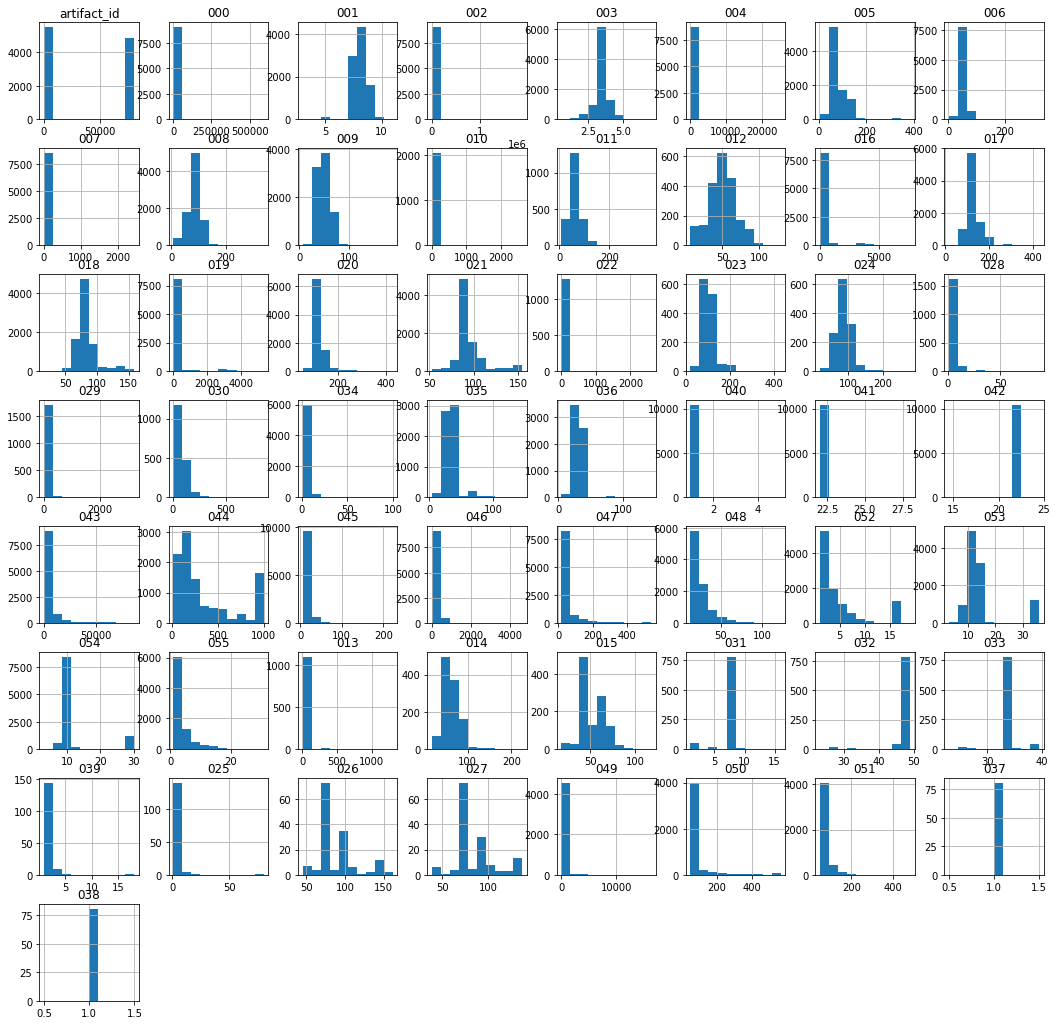

In [5]:
# show histograms of all features
df.hist(figsize=(18, 18));

In [6]:
# # separate training and testing
# from sklearn.model_selection import train_test_split
# y = df['disposition']
# X = df.drop(['family', 'disposition', 'artifact_id'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

y = df['family']
y[y != 'onlinerspambot'] = 'none'
X = df.drop(['family', 'disposition', 'artifact_id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
# Handle missing values
from sklearn.impute import SimpleImputer
col_names = X_train.columns
imp = SimpleImputer(strategy='median')
imp.fit(X_train)
X_train = pd.DataFrame(imp.transform(X_train), columns=col_names)
X_test = pd.DataFrame(imp.transform(X_test), columns=col_names)

# Show we have no missing values
X_train.isnull().sum().sum()


0

In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)

col_names = X_train.columns
X_train = pd.DataFrame(scaler.transform(X_train), columns=col_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

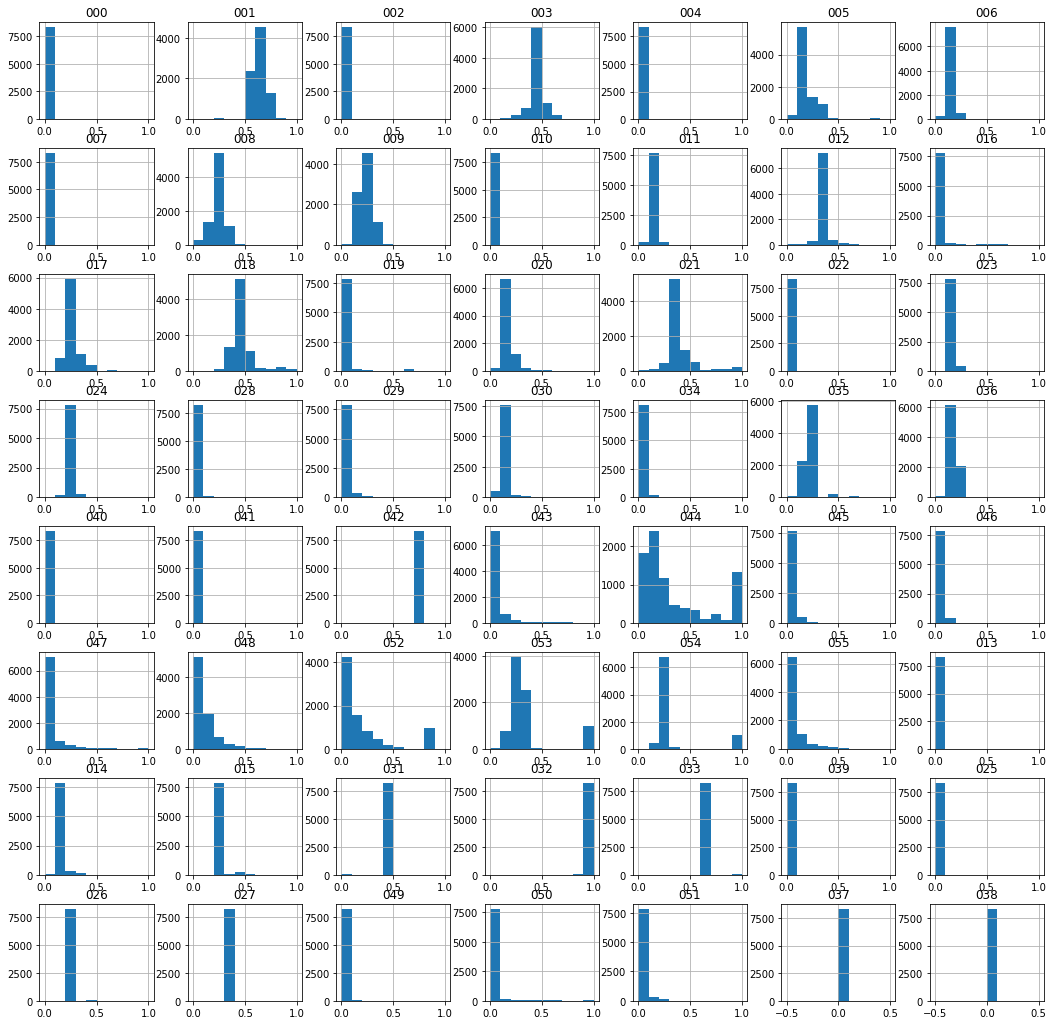

In [9]:
# Show hist 
X_train.hist(figsize=(18, 18));

In [10]:
# Feature selection
# variance threshold feature reduction

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = SelectKBest(chi2, k=20)
k_best.fit(X_train, y_train)
col_names = X_train.columns[k_best.get_support(indices=True)]
X_train = X_train[col_names]
X_test = X_test[col_names]

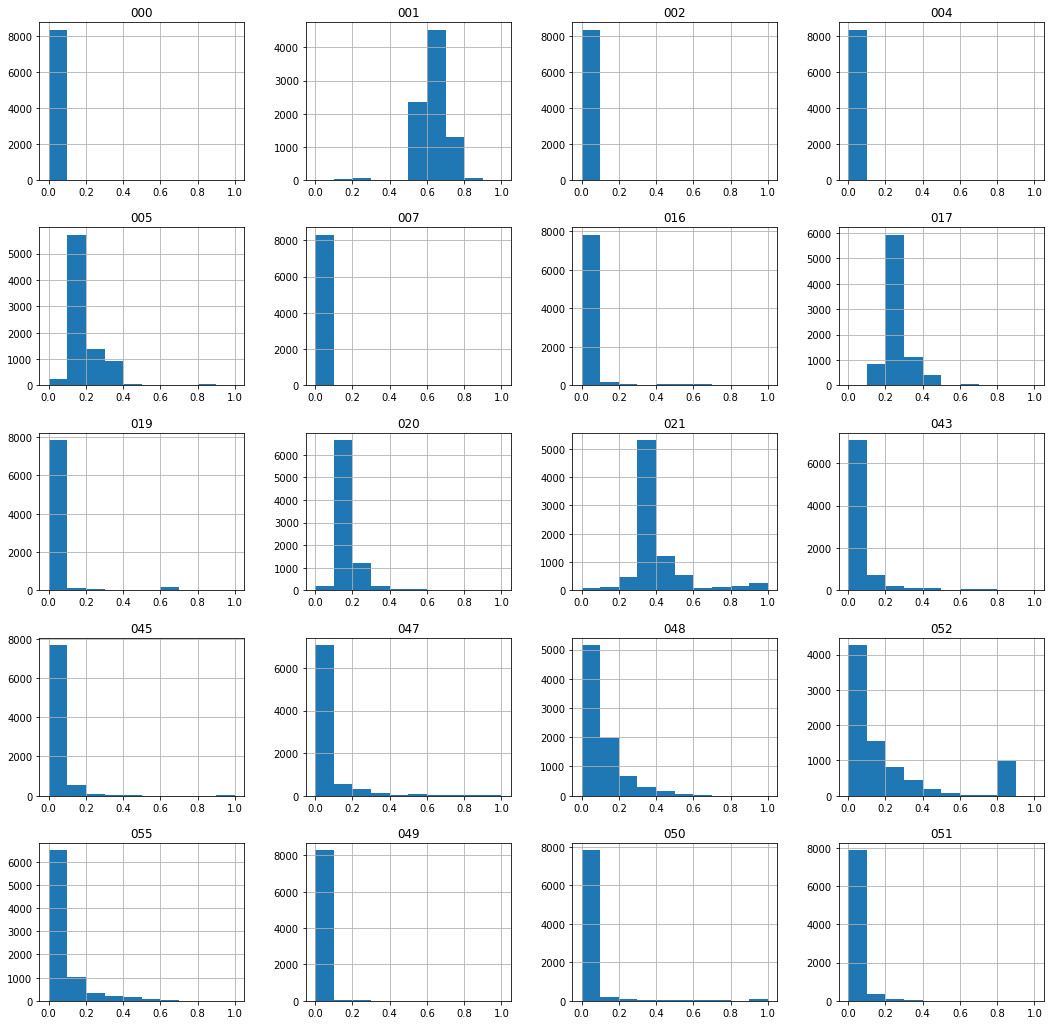

In [11]:
X_train.hist(figsize=(18, 18));

In [19]:
# Use KNN to train and fit classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Perform Predictions
y_pred = knn.predict(X_test)

c:\Users\micha\projects\orca-private\env\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

      benign       0.93      0.92      0.92       954
     suspect       0.93      0.94      0.94      1134

    accuracy                           0.93      2088
   macro avg       0.93      0.93      0.93      2088
weighted avg       0.93      0.93      0.93      2088



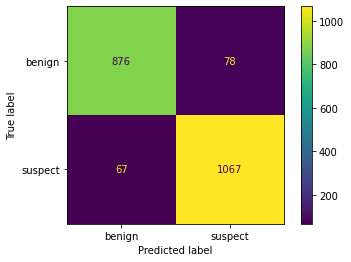

In [13]:
# Display report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();